In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [110]:
data = pd.read_csv('final-data.csv')

In [111]:
data['Week Endings'] = pd.to_datetime(data['Week Endings'], errors = 'raise')
data = data.sort_values(by='Week Endings', ascending=True)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1266 entries, 1265 to 0
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week Endings          1266 non-null   datetime64[ns]
 1   Avg Ticket Price ($)  1266 non-null   float64       
 2   Top Ticket Price ($)  1266 non-null   float64       
 3   Seats Sold            1266 non-null   int64         
 4   Seats in Theatre      1266 non-null   int64         
 5   % Cap                 1266 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 69.2 KB


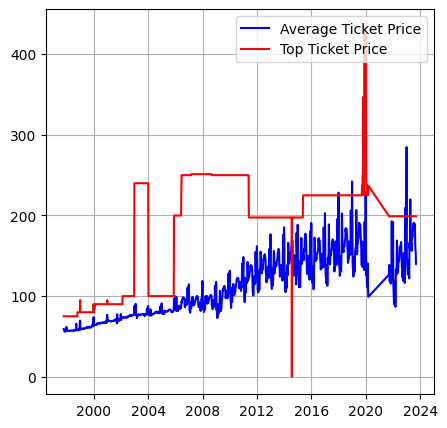

In [113]:
# Some basic plotting to check data and 
# data scale to determine whether data needs to be normalised or not
# before being used with the sequence model for prediction
# year = np.array(range(data.shape[0])) + 757
time = data['Week Endings']
plt.figure(figsize=(5, 5))
plt.grid(True)
plt.plot(time, data['Avg Ticket Price ($)'], color='b', label="Average Ticket Price")
plt.plot(time, data['Top Ticket Price ($)'], color='r', label="Top Ticket Price")
plt.legend(loc=1)
plt.show()

In [114]:
series = data['Avg Ticket Price ($)']
split_time = int(len(series) * 0.8)

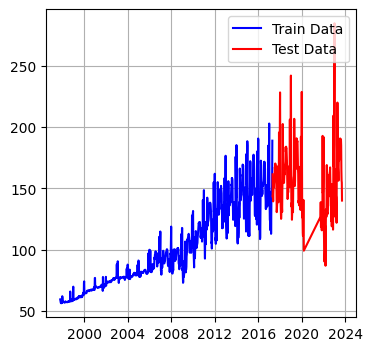

In [115]:
x_train = series[:split_time]
time_train = time[:split_time]
x_valid = series[split_time:]
time_valid = time[split_time:]

plt.figure(figsize=(4, 4))
plt.grid(True)
plt.plot(time_train, x_train, color='b', label="Train Data")
plt.plot(time_valid, x_valid, color='r', label="Test Data")
plt.legend(loc=1)
plt.show()

# Utilities:

In [116]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset